## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  81.923646   285.876683  0.624645   1.770021  1.150299
1  13.069116   871.952654  0.051976  10.188896  1.303879
2  74.469773  1180.453330  0.894122   9.888377  1.348546
3   7.200029  1456.879780  0.372203  10.607969  1.466525
4  84.470823   319.495795  0.659174  10.179736  1.276091


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.00663 | train_mse: 5.33972 | train_mae: 1.66504 |  0:00:00s
epoch 1  | loss: 1.15024 | train_mse: 3.53714 | train_mae: 1.41518 |  0:00:00s
epoch 2  | loss: 1.10526 | train_mse: 2.93483 | train_mae: 1.32859 |  0:00:00s


epoch 3  | loss: 0.80684 | train_mse: 2.51842 | train_mae: 1.21772 |  0:00:00s
epoch 4  | loss: 0.85673 | train_mse: 2.23862 | train_mae: 1.13256 |  0:00:00s
epoch 5  | loss: 0.87169 | train_mse: 1.96689 | train_mae: 1.03751 |  0:00:00s


epoch 6  | loss: 0.90457 | train_mse: 1.80411 | train_mae: 0.98899 |  0:00:00s
epoch 7  | loss: 0.79588 | train_mse: 1.64163 | train_mae: 0.93091 |  0:00:00s
epoch 8  | loss: 0.94466 | train_mse: 1.52782 | train_mae: 0.90199 |  0:00:01s


epoch 9  | loss: 0.75475 | train_mse: 1.38752 | train_mae: 0.86985 |  0:00:01s
epoch 10 | loss: 0.78275 | train_mse: 1.25215 | train_mae: 0.81769 |  0:00:01s


epoch 11 | loss: 0.65938 | train_mse: 1.12505 | train_mae: 0.7745  |  0:00:01s
epoch 12 | loss: 0.64441 | train_mse: 0.92772 | train_mae: 0.71124 |  0:00:01s


epoch 13 | loss: 0.70349 | train_mse: 0.83663 | train_mae: 0.67368 |  0:00:01s
epoch 14 | loss: 0.71138 | train_mse: 0.77246 | train_mae: 0.6528  |  0:00:01s


epoch 15 | loss: 0.57926 | train_mse: 0.69149 | train_mae: 0.6283  |  0:00:02s
epoch 16 | loss: 0.60872 | train_mse: 0.64168 | train_mae: 0.60982 |  0:00:02s


epoch 17 | loss: 0.5697  | train_mse: 0.63846 | train_mae: 0.61543 |  0:00:02s
epoch 18 | loss: 0.5667  | train_mse: 0.60846 | train_mae: 0.59805 |  0:00:02s
epoch 19 | loss: 0.49495 | train_mse: 0.57821 | train_mae: 0.58236 |  0:00:02s


epoch 20 | loss: 0.62501 | train_mse: 0.5522  | train_mae: 0.56913 |  0:00:02s


epoch 21 | loss: 0.73697 | train_mse: 0.53062 | train_mae: 0.55895 |  0:00:02s
epoch 22 | loss: 0.68887 | train_mse: 0.50415 | train_mae: 0.54209 |  0:00:02s


epoch 23 | loss: 0.49973 | train_mse: 0.48295 | train_mae: 0.53179 |  0:00:03s
epoch 24 | loss: 0.61069 | train_mse: 0.46565 | train_mae: 0.51981 |  0:00:03s


epoch 25 | loss: 0.52895 | train_mse: 0.4563  | train_mae: 0.51408 |  0:00:03s
epoch 26 | loss: 0.49179 | train_mse: 0.44887 | train_mae: 0.50874 |  0:00:03s


epoch 27 | loss: 0.35391 | train_mse: 0.43197 | train_mae: 0.50229 |  0:00:03s
epoch 28 | loss: 0.4796  | train_mse: 0.42004 | train_mae: 0.4968  |  0:00:03s


epoch 29 | loss: 0.4704  | train_mse: 0.40982 | train_mae: 0.49268 |  0:00:03s
epoch 30 | loss: 0.37265 | train_mse: 0.39625 | train_mae: 0.48704 |  0:00:03s


epoch 31 | loss: 0.49358 | train_mse: 0.38403 | train_mae: 0.47983 |  0:00:04s
epoch 32 | loss: 0.30815 | train_mse: 0.37539 | train_mae: 0.47842 |  0:00:04s


epoch 33 | loss: 0.41568 | train_mse: 0.3689  | train_mae: 0.47697 |  0:00:04s
epoch 34 | loss: 0.42509 | train_mse: 0.3634  | train_mae: 0.47491 |  0:00:04s


epoch 35 | loss: 0.36853 | train_mse: 0.35458 | train_mae: 0.46961 |  0:00:04s
epoch 36 | loss: 0.45402 | train_mse: 0.34343 | train_mae: 0.4614  |  0:00:04s


epoch 37 | loss: 0.60389 | train_mse: 0.33212 | train_mae: 0.45169 |  0:00:04s
epoch 38 | loss: 0.39336 | train_mse: 0.32498 | train_mae: 0.4466  |  0:00:04s


epoch 39 | loss: 0.40764 | train_mse: 0.31664 | train_mae: 0.44156 |  0:00:05s
epoch 40 | loss: 0.44165 | train_mse: 0.31435 | train_mae: 0.43925 |  0:00:05s
epoch 41 | loss: 0.38234 | train_mse: 0.30688 | train_mae: 0.43181 |  0:00:05s


epoch 42 | loss: 0.42681 | train_mse: 0.30272 | train_mae: 0.42918 |  0:00:05s
epoch 43 | loss: 0.63913 | train_mse: 0.29723 | train_mae: 0.42635 |  0:00:05s
epoch 44 | loss: 0.46648 | train_mse: 0.29559 | train_mae: 0.42788 |  0:00:05s


epoch 45 | loss: 0.32802 | train_mse: 0.29089 | train_mae: 0.42376 |  0:00:05s
epoch 46 | loss: 0.28069 | train_mse: 0.28633 | train_mae: 0.42094 |  0:00:05s
epoch 47 | loss: 0.36698 | train_mse: 0.2831  | train_mae: 0.42047 |  0:00:05s


epoch 48 | loss: 0.52515 | train_mse: 0.28323 | train_mae: 0.42324 |  0:00:05s
epoch 49 | loss: 0.40443 | train_mse: 0.28514 | train_mae: 0.42585 |  0:00:05s
epoch 50 | loss: 0.2963  | train_mse: 0.28744 | train_mae: 0.425   |  0:00:06s


epoch 51 | loss: 0.3457  | train_mse: 0.28989 | train_mae: 0.42656 |  0:00:06s
epoch 52 | loss: 0.3322  | train_mse: 0.27884 | train_mae: 0.41903 |  0:00:06s
epoch 53 | loss: 0.34952 | train_mse: 0.27099 | train_mae: 0.40929 |  0:00:06s


epoch 54 | loss: 0.34167 | train_mse: 0.26858 | train_mae: 0.40929 |  0:00:06s
epoch 55 | loss: 0.42855 | train_mse: 0.26541 | train_mae: 0.40833 |  0:00:06s
epoch 56 | loss: 0.35501 | train_mse: 0.25857 | train_mae: 0.40114 |  0:00:06s


epoch 57 | loss: 0.34078 | train_mse: 0.25943 | train_mae: 0.40256 |  0:00:06s
epoch 58 | loss: 0.41552 | train_mse: 0.29305 | train_mae: 0.42086 |  0:00:06s
epoch 59 | loss: 0.2919  | train_mse: 0.27359 | train_mae: 0.41081 |  0:00:06s


epoch 60 | loss: 0.24561 | train_mse: 0.256   | train_mae: 0.39803 |  0:00:06s
epoch 61 | loss: 0.32774 | train_mse: 0.25084 | train_mae: 0.39368 |  0:00:07s
epoch 62 | loss: 0.40477 | train_mse: 0.24153 | train_mae: 0.38255 |  0:00:07s


epoch 63 | loss: 0.28218 | train_mse: 0.23779 | train_mae: 0.3786  |  0:00:07s
epoch 64 | loss: 0.26439 | train_mse: 0.23451 | train_mae: 0.37426 |  0:00:07s
epoch 65 | loss: 0.39108 | train_mse: 0.233   | train_mae: 0.3701  |  0:00:07s


epoch 66 | loss: 0.46775 | train_mse: 0.23434 | train_mae: 0.36934 |  0:00:07s
epoch 67 | loss: 0.24132 | train_mse: 0.2349  | train_mae: 0.36925 |  0:00:07s


epoch 68 | loss: 0.31304 | train_mse: 0.23726 | train_mae: 0.37186 |  0:00:07s
epoch 69 | loss: 0.22696 | train_mse: 0.22899 | train_mae: 0.36441 |  0:00:07s
epoch 70 | loss: 0.36842 | train_mse: 0.22644 | train_mae: 0.36698 |  0:00:07s


epoch 71 | loss: 0.41712 | train_mse: 0.22566 | train_mae: 0.36779 |  0:00:07s
epoch 72 | loss: 0.246   | train_mse: 0.2249  | train_mae: 0.36667 |  0:00:08s
epoch 73 | loss: 0.28382 | train_mse: 0.22829 | train_mae: 0.37222 |  0:00:08s


epoch 74 | loss: 0.38292 | train_mse: 0.22632 | train_mae: 0.3693  |  0:00:08s
epoch 75 | loss: 0.31862 | train_mse: 0.22679 | train_mae: 0.37276 |  0:00:08s
epoch 76 | loss: 0.38155 | train_mse: 0.22227 | train_mae: 0.37021 |  0:00:08s


epoch 77 | loss: 0.26377 | train_mse: 0.21913 | train_mae: 0.36828 |  0:00:08s
epoch 78 | loss: 0.19597 | train_mse: 0.21839 | train_mae: 0.36893 |  0:00:08s


epoch 79 | loss: 0.46913 | train_mse: 0.21573 | train_mae: 0.36403 |  0:00:08s
epoch 80 | loss: 0.22419 | train_mse: 0.21479 | train_mae: 0.36206 |  0:00:08s
epoch 81 | loss: 0.26065 | train_mse: 0.21478 | train_mae: 0.36177 |  0:00:08s


epoch 82 | loss: 0.26821 | train_mse: 0.20915 | train_mae: 0.35717 |  0:00:08s
epoch 83 | loss: 0.2724  | train_mse: 0.20546 | train_mae: 0.35637 |  0:00:09s
epoch 84 | loss: 0.32992 | train_mse: 0.20471 | train_mae: 0.35735 |  0:00:09s


epoch 85 | loss: 0.33355 | train_mse: 0.21076 | train_mae: 0.36016 |  0:00:09s
epoch 86 | loss: 0.28657 | train_mse: 0.21117 | train_mae: 0.35917 |  0:00:09s
epoch 87 | loss: 0.34737 | train_mse: 0.20336 | train_mae: 0.35475 |  0:00:09s


epoch 88 | loss: 0.30559 | train_mse: 0.1998  | train_mae: 0.35334 |  0:00:09s
epoch 89 | loss: 0.26519 | train_mse: 0.19475 | train_mae: 0.34904 |  0:00:09s
epoch 90 | loss: 0.27109 | train_mse: 0.18906 | train_mae: 0.34274 |  0:00:09s


epoch 91 | loss: 0.32878 | train_mse: 0.18701 | train_mae: 0.34174 |  0:00:09s
epoch 92 | loss: 0.20082 | train_mse: 0.18559 | train_mae: 0.33827 |  0:00:09s


epoch 93 | loss: 0.2919  | train_mse: 0.18584 | train_mae: 0.3397  |  0:00:09s
epoch 94 | loss: 0.324   | train_mse: 0.18339 | train_mae: 0.33747 |  0:00:10s
epoch 95 | loss: 0.22114 | train_mse: 0.18232 | train_mae: 0.33784 |  0:00:10s


epoch 96 | loss: 0.29731 | train_mse: 0.18307 | train_mae: 0.33889 |  0:00:10s
epoch 97 | loss: 0.21207 | train_mse: 0.18417 | train_mae: 0.33954 |  0:00:10s
epoch 98 | loss: 0.28449 | train_mse: 0.18585 | train_mae: 0.34141 |  0:00:10s


epoch 99 | loss: 0.25227 | train_mse: 0.18279 | train_mae: 0.33904 |  0:00:10s
epoch 100| loss: 0.26409 | train_mse: 0.17527 | train_mae: 0.33431 |  0:00:10s


epoch 101| loss: 0.37294 | train_mse: 0.1708  | train_mae: 0.33068 |  0:00:10s
epoch 102| loss: 0.3856  | train_mse: 0.17025 | train_mae: 0.33279 |  0:00:10s
epoch 103| loss: 0.20633 | train_mse: 0.16888 | train_mae: 0.33195 |  0:00:10s


epoch 104| loss: 0.27693 | train_mse: 0.1698  | train_mae: 0.33218 |  0:00:10s
epoch 105| loss: 0.50231 | train_mse: 0.17665 | train_mae: 0.33797 |  0:00:10s
epoch 106| loss: 0.2889  | train_mse: 0.17161 | train_mae: 0.3349  |  0:00:11s


epoch 107| loss: 0.22002 | train_mse: 0.17097 | train_mae: 0.33561 |  0:00:11s
epoch 108| loss: 0.21519 | train_mse: 0.17047 | train_mae: 0.33267 |  0:00:11s
epoch 109| loss: 0.20649 | train_mse: 0.16742 | train_mae: 0.32842 |  0:00:11s


epoch 110| loss: 0.20974 | train_mse: 0.16746 | train_mae: 0.32915 |  0:00:11s
epoch 111| loss: 0.24741 | train_mse: 0.16977 | train_mae: 0.3307  |  0:00:11s
epoch 112| loss: 0.1882  | train_mse: 0.16783 | train_mae: 0.32867 |  0:00:11s


epoch 113| loss: 0.17628 | train_mse: 0.16392 | train_mae: 0.32752 |  0:00:11s
epoch 114| loss: 0.24599 | train_mse: 0.16242 | train_mae: 0.32761 |  0:00:11s
epoch 115| loss: 0.2957  | train_mse: 0.15815 | train_mae: 0.32339 |  0:00:11s


epoch 116| loss: 0.26266 | train_mse: 0.15359 | train_mae: 0.3195  |  0:00:11s
epoch 117| loss: 0.1926  | train_mse: 0.1504  | train_mae: 0.31661 |  0:00:12s
epoch 118| loss: 0.24227 | train_mse: 0.14608 | train_mae: 0.31077 |  0:00:12s


epoch 119| loss: 0.25831 | train_mse: 0.14409 | train_mae: 0.30926 |  0:00:12s
epoch 120| loss: 0.21117 | train_mse: 0.139   | train_mae: 0.30344 |  0:00:12s
epoch 121| loss: 0.26574 | train_mse: 0.13494 | train_mae: 0.29901 |  0:00:12s


epoch 122| loss: 0.31743 | train_mse: 0.13526 | train_mae: 0.29961 |  0:00:12s
epoch 123| loss: 0.15531 | train_mse: 0.13514 | train_mae: 0.29888 |  0:00:12s
epoch 124| loss: 0.24857 | train_mse: 0.13203 | train_mae: 0.2956  |  0:00:12s


epoch 125| loss: 0.25936 | train_mse: 0.13193 | train_mae: 0.29836 |  0:00:12s
epoch 126| loss: 0.3038  | train_mse: 0.13105 | train_mae: 0.29957 |  0:00:12s


epoch 127| loss: 0.23077 | train_mse: 0.1307  | train_mae: 0.30172 |  0:00:12s
epoch 128| loss: 0.22602 | train_mse: 0.13063 | train_mae: 0.30247 |  0:00:13s
epoch 129| loss: 0.30149 | train_mse: 0.13388 | train_mae: 0.30379 |  0:00:13s


epoch 130| loss: 0.28878 | train_mse: 0.13679 | train_mae: 0.30927 |  0:00:13s
epoch 131| loss: 0.23258 | train_mse: 0.13711 | train_mae: 0.30783 |  0:00:13s
epoch 132| loss: 0.2852  | train_mse: 0.13801 | train_mae: 0.30773 |  0:00:13s


epoch 133| loss: 0.18424 | train_mse: 0.14206 | train_mae: 0.30978 |  0:00:13s
epoch 134| loss: 0.20356 | train_mse: 0.14197 | train_mae: 0.30849 |  0:00:13s
epoch 135| loss: 0.27616 | train_mse: 0.14046 | train_mae: 0.30723 |  0:00:13s


epoch 136| loss: 0.14645 | train_mse: 0.14067 | train_mae: 0.30852 |  0:00:13s
epoch 137| loss: 0.23508 | train_mse: 0.14055 | train_mae: 0.30762 |  0:00:13s
epoch 138| loss: 0.18064 | train_mse: 0.14305 | train_mae: 0.31041 |  0:00:13s


epoch 139| loss: 0.26945 | train_mse: 0.14279 | train_mae: 0.30991 |  0:00:14s
epoch 140| loss: 0.24149 | train_mse: 0.14258 | train_mae: 0.31015 |  0:00:14s


epoch 141| loss: 0.26459 | train_mse: 0.14319 | train_mae: 0.30983 |  0:00:14s
epoch 142| loss: 0.25537 | train_mse: 0.14415 | train_mae: 0.31079 |  0:00:14s
epoch 143| loss: 0.23157 | train_mse: 0.1407  | train_mae: 0.30678 |  0:00:14s


epoch 144| loss: 0.22758 | train_mse: 0.13376 | train_mae: 0.29998 |  0:00:14s
epoch 145| loss: 0.21991 | train_mse: 0.13851 | train_mae: 0.30375 |  0:00:14s
epoch 146| loss: 0.20633 | train_mse: 0.13652 | train_mae: 0.3004  |  0:00:14s


epoch 147| loss: 0.17039 | train_mse: 0.12811 | train_mae: 0.29512 |  0:00:14s
epoch 148| loss: 0.25715 | train_mse: 0.12648 | train_mae: 0.29369 |  0:00:14s
epoch 149| loss: 0.15623 | train_mse: 0.12945 | train_mae: 0.29674 |  0:00:14s


epoch 150| loss: 0.21262 | train_mse: 0.12463 | train_mae: 0.28876 |  0:00:14s
epoch 151| loss: 0.23326 | train_mse: 0.13044 | train_mae: 0.29641 |  0:00:15s
epoch 152| loss: 0.20654 | train_mse: 0.12983 | train_mae: 0.29518 |  0:00:15s


epoch 153| loss: 0.41717 | train_mse: 0.12658 | train_mae: 0.29088 |  0:00:15s
epoch 154| loss: 0.2666  | train_mse: 0.12587 | train_mae: 0.29255 |  0:00:15s
epoch 155| loss: 0.28247 | train_mse: 0.12329 | train_mae: 0.28678 |  0:00:15s


epoch 156| loss: 0.4574  | train_mse: 0.1225  | train_mae: 0.28558 |  0:00:15s
epoch 157| loss: 0.26142 | train_mse: 0.12215 | train_mae: 0.2854  |  0:00:15s
epoch 158| loss: 0.24591 | train_mse: 0.12267 | train_mae: 0.28419 |  0:00:15s


epoch 159| loss: 0.24009 | train_mse: 0.12171 | train_mae: 0.27994 |  0:00:15s
epoch 160| loss: 0.15105 | train_mse: 0.12018 | train_mae: 0.27722 |  0:00:15s
epoch 161| loss: 0.18063 | train_mse: 0.11877 | train_mae: 0.27574 |  0:00:15s


epoch 162| loss: 0.24181 | train_mse: 0.11803 | train_mae: 0.27644 |  0:00:16s
epoch 163| loss: 0.23782 | train_mse: 0.11605 | train_mae: 0.27552 |  0:00:16s
epoch 164| loss: 0.21992 | train_mse: 0.10962 | train_mae: 0.26959 |  0:00:16s


epoch 165| loss: 0.21811 | train_mse: 0.10764 | train_mae: 0.26559 |  0:00:16s
epoch 166| loss: 0.10739 | train_mse: 0.10665 | train_mae: 0.26572 |  0:00:16s
epoch 167| loss: 0.22493 | train_mse: 0.11116 | train_mae: 0.26992 |  0:00:16s


epoch 168| loss: 0.15444 | train_mse: 0.11131 | train_mae: 0.26972 |  0:00:16s
epoch 169| loss: 0.1902  | train_mse: 0.10913 | train_mae: 0.26849 |  0:00:16s
epoch 170| loss: 0.23099 | train_mse: 0.10436 | train_mae: 0.26144 |  0:00:16s


epoch 171| loss: 0.22775 | train_mse: 0.10485 | train_mae: 0.26018 |  0:00:16s
epoch 172| loss: 0.23722 | train_mse: 0.10535 | train_mae: 0.26254 |  0:00:16s
epoch 173| loss: 0.30251 | train_mse: 0.10566 | train_mae: 0.26307 |  0:00:16s


epoch 174| loss: 0.16888 | train_mse: 0.10079 | train_mae: 0.25693 |  0:00:17s
epoch 175| loss: 0.2169  | train_mse: 0.09939 | train_mae: 0.25475 |  0:00:17s
epoch 176| loss: 0.17453 | train_mse: 0.10064 | train_mae: 0.25795 |  0:00:17s


epoch 177| loss: 0.12561 | train_mse: 0.10264 | train_mae: 0.26163 |  0:00:17s
epoch 178| loss: 0.19178 | train_mse: 0.10133 | train_mae: 0.25886 |  0:00:17s
epoch 179| loss: 0.12533 | train_mse: 0.10085 | train_mae: 0.25847 |  0:00:17s


epoch 180| loss: 0.28657 | train_mse: 0.09927 | train_mae: 0.25524 |  0:00:17s
epoch 181| loss: 0.28913 | train_mse: 0.10257 | train_mae: 0.25879 |  0:00:17s
epoch 182| loss: 0.20359 | train_mse: 0.1036  | train_mae: 0.26017 |  0:00:17s


epoch 183| loss: 0.24609 | train_mse: 0.10304 | train_mae: 0.25836 |  0:00:17s
epoch 184| loss: 0.16083 | train_mse: 0.10252 | train_mae: 0.25791 |  0:00:17s
epoch 185| loss: 0.21214 | train_mse: 0.10216 | train_mae: 0.25906 |  0:00:18s


epoch 186| loss: 0.2675  | train_mse: 0.10416 | train_mae: 0.26262 |  0:00:18s
epoch 187| loss: 0.17489 | train_mse: 0.10232 | train_mae: 0.26106 |  0:00:18s
epoch 188| loss: 0.26431 | train_mse: 0.09924 | train_mae: 0.25542 |  0:00:18s


epoch 189| loss: 0.15475 | train_mse: 0.10041 | train_mae: 0.25754 |  0:00:18s
epoch 190| loss: 0.17292 | train_mse: 0.09702 | train_mae: 0.25456 |  0:00:18s
epoch 191| loss: 0.16944 | train_mse: 0.09726 | train_mae: 0.2553  |  0:00:18s


epoch 192| loss: 0.10387 | train_mse: 0.10062 | train_mae: 0.25886 |  0:00:18s
epoch 193| loss: 0.22061 | train_mse: 0.09468 | train_mae: 0.25054 |  0:00:18s
epoch 194| loss: 0.15028 | train_mse: 0.09448 | train_mae: 0.25036 |  0:00:18s


epoch 195| loss: 0.31214 | train_mse: 0.08712 | train_mae: 0.24163 |  0:00:18s
epoch 196| loss: 0.15502 | train_mse: 0.0891  | train_mae: 0.24401 |  0:00:18s
epoch 197| loss: 0.12547 | train_mse: 0.09712 | train_mae: 0.25391 |  0:00:19s


epoch 198| loss: 0.11545 | train_mse: 0.10093 | train_mae: 0.25982 |  0:00:19s
epoch 199| loss: 0.18146 | train_mse: 0.10077 | train_mae: 0.26036 |  0:00:19s
epoch 200| loss: 0.14265 | train_mse: 0.10027 | train_mae: 0.2592  |  0:00:19s


epoch 201| loss: 0.13941 | train_mse: 0.09861 | train_mae: 0.25548 |  0:00:19s
epoch 202| loss: 0.3086  | train_mse: 0.1055  | train_mae: 0.26504 |  0:00:19s
epoch 203| loss: 0.19467 | train_mse: 0.11634 | train_mae: 0.27019 |  0:00:19s


epoch 204| loss: 0.28756 | train_mse: 0.09891 | train_mae: 0.25605 |  0:00:19s
epoch 205| loss: 0.16735 | train_mse: 0.10085 | train_mae: 0.25581 |  0:00:19s
epoch 206| loss: 0.14489 | train_mse: 0.10219 | train_mae: 0.25404 |  0:00:19s


epoch 207| loss: 0.29331 | train_mse: 0.10214 | train_mae: 0.25369 |  0:00:19s
epoch 208| loss: 0.14195 | train_mse: 0.10293 | train_mae: 0.2555  |  0:00:20s
epoch 209| loss: 0.16476 | train_mse: 0.10542 | train_mae: 0.25899 |  0:00:20s


epoch 210| loss: 0.13005 | train_mse: 0.11117 | train_mae: 0.26421 |  0:00:20s
epoch 211| loss: 0.19552 | train_mse: 0.1167  | train_mae: 0.26885 |  0:00:20s
epoch 212| loss: 0.1502  | train_mse: 0.11696 | train_mae: 0.26944 |  0:00:20s


epoch 213| loss: 0.12498 | train_mse: 0.11543 | train_mae: 0.27119 |  0:00:20s
epoch 214| loss: 0.14637 | train_mse: 0.12284 | train_mae: 0.27745 |  0:00:20s
epoch 215| loss: 0.10348 | train_mse: 0.12104 | train_mae: 0.27676 |  0:00:20s


epoch 216| loss: 0.12724 | train_mse: 0.11878 | train_mae: 0.27492 |  0:00:20s
epoch 217| loss: 0.19616 | train_mse: 0.11069 | train_mae: 0.26468 |  0:00:20s


epoch 218| loss: 0.16665 | train_mse: 0.10997 | train_mae: 0.26384 |  0:00:20s
epoch 219| loss: 0.19396 | train_mse: 0.11052 | train_mae: 0.26724 |  0:00:20s
epoch 220| loss: 0.15238 | train_mse: 0.11236 | train_mae: 0.27125 |  0:00:21s


epoch 221| loss: 0.13037 | train_mse: 0.11458 | train_mae: 0.27329 |  0:00:21s
epoch 222| loss: 0.24104 | train_mse: 0.11601 | train_mae: 0.27335 |  0:00:21s
epoch 223| loss: 0.13047 | train_mse: 0.11702 | train_mae: 0.27232 |  0:00:21s


epoch 224| loss: 0.28664 | train_mse: 0.11639 | train_mae: 0.27012 |  0:00:21s
epoch 225| loss: 0.37679 | train_mse: 0.1146  | train_mae: 0.26668 |  0:00:21s
epoch 226| loss: 0.18494 | train_mse: 0.11246 | train_mae: 0.26332 |  0:00:21s


epoch 227| loss: 0.17465 | train_mse: 0.10991 | train_mae: 0.26059 |  0:00:21s
epoch 228| loss: 0.15858 | train_mse: 0.10831 | train_mae: 0.25637 |  0:00:21s
epoch 229| loss: 0.25877 | train_mse: 0.11053 | train_mae: 0.25611 |  0:00:21s


epoch 230| loss: 0.13986 | train_mse: 0.10901 | train_mae: 0.25348 |  0:00:21s
epoch 231| loss: 0.20742 | train_mse: 0.10507 | train_mae: 0.24754 |  0:00:21s
epoch 232| loss: 0.13687 | train_mse: 0.10244 | train_mae: 0.24404 |  0:00:22s


epoch 233| loss: 0.18183 | train_mse: 0.1076  | train_mae: 0.24871 |  0:00:22s
epoch 234| loss: 0.1448  | train_mse: 0.10758 | train_mae: 0.24824 |  0:00:22s
epoch 235| loss: 0.13017 | train_mse: 0.10426 | train_mae: 0.24562 |  0:00:22s


epoch 236| loss: 0.19223 | train_mse: 0.09891 | train_mae: 0.23917 |  0:00:22s
epoch 237| loss: 0.18421 | train_mse: 0.09983 | train_mae: 0.24041 |  0:00:22s


epoch 238| loss: 0.11648 | train_mse: 0.09718 | train_mae: 0.23652 |  0:00:22s
epoch 239| loss: 0.16602 | train_mse: 0.09171 | train_mae: 0.22927 |  0:00:22s
epoch 240| loss: 0.35265 | train_mse: 0.08945 | train_mae: 0.22576 |  0:00:22s


epoch 241| loss: 0.15819 | train_mse: 0.08595 | train_mae: 0.22324 |  0:00:22s
epoch 242| loss: 0.14835 | train_mse: 0.08413 | train_mae: 0.22062 |  0:00:22s
epoch 243| loss: 0.17338 | train_mse: 0.08465 | train_mae: 0.22376 |  0:00:23s


epoch 244| loss: 0.19236 | train_mse: 0.08576 | train_mae: 0.22531 |  0:00:23s
epoch 245| loss: 0.20431 | train_mse: 0.08638 | train_mae: 0.22574 |  0:00:23s
epoch 246| loss: 0.14839 | train_mse: 0.08543 | train_mae: 0.22395 |  0:00:23s


epoch 247| loss: 0.20509 | train_mse: 0.08626 | train_mae: 0.22491 |  0:00:23s
epoch 248| loss: 0.17062 | train_mse: 0.08655 | train_mae: 0.2243  |  0:00:23s
epoch 249| loss: 0.17382 | train_mse: 0.08888 | train_mae: 0.22722 |  0:00:23s


epoch 250| loss: 0.28284 | train_mse: 0.08918 | train_mae: 0.22718 |  0:00:23s
epoch 251| loss: 0.21489 | train_mse: 0.09108 | train_mae: 0.23038 |  0:00:23s
epoch 252| loss: 0.13619 | train_mse: 0.09551 | train_mae: 0.236   |  0:00:23s


epoch 253| loss: 0.12288 | train_mse: 0.09409 | train_mae: 0.23398 |  0:00:23s
epoch 254| loss: 0.14157 | train_mse: 0.09319 | train_mae: 0.23288 |  0:00:23s
epoch 255| loss: 0.16304 | train_mse: 0.09673 | train_mae: 0.23846 |  0:00:24s


epoch 256| loss: 0.15741 | train_mse: 0.09301 | train_mae: 0.23366 |  0:00:24s
epoch 257| loss: 0.27394 | train_mse: 0.09088 | train_mae: 0.23198 |  0:00:24s
epoch 258| loss: 0.09754 | train_mse: 0.08962 | train_mae: 0.22919 |  0:00:24s


epoch 259| loss: 0.14598 | train_mse: 0.08737 | train_mae: 0.22329 |  0:00:24s
epoch 260| loss: 0.18186 | train_mse: 0.08787 | train_mae: 0.22405 |  0:00:24s
epoch 261| loss: 0.1086  | train_mse: 0.08508 | train_mae: 0.22371 |  0:00:24s


epoch 262| loss: 0.19457 | train_mse: 0.08449 | train_mae: 0.22445 |  0:00:24s
epoch 263| loss: 0.22354 | train_mse: 0.08404 | train_mae: 0.22526 |  0:00:24s
epoch 264| loss: 0.20477 | train_mse: 0.08583 | train_mae: 0.22636 |  0:00:24s


epoch 265| loss: 0.16193 | train_mse: 0.08602 | train_mae: 0.22771 |  0:00:24s
epoch 266| loss: 0.24917 | train_mse: 0.0873  | train_mae: 0.23129 |  0:00:24s
epoch 267| loss: 0.14275 | train_mse: 0.08735 | train_mae: 0.23072 |  0:00:25s


epoch 268| loss: 0.09719 | train_mse: 0.08608 | train_mae: 0.22995 |  0:00:25s
epoch 269| loss: 0.19952 | train_mse: 0.08852 | train_mae: 0.23441 |  0:00:25s
epoch 270| loss: 0.16851 | train_mse: 0.08754 | train_mae: 0.23321 |  0:00:25s


epoch 271| loss: 0.19287 | train_mse: 0.08603 | train_mae: 0.23056 |  0:00:25s
epoch 272| loss: 0.17494 | train_mse: 0.0816  | train_mae: 0.22461 |  0:00:25s
epoch 273| loss: 0.14938 | train_mse: 0.07757 | train_mae: 0.21754 |  0:00:25s


epoch 274| loss: 0.14416 | train_mse: 0.07365 | train_mae: 0.20943 |  0:00:25s
epoch 275| loss: 0.13247 | train_mse: 0.07394 | train_mae: 0.20965 |  0:00:25s
epoch 276| loss: 0.12618 | train_mse: 0.07253 | train_mae: 0.20895 |  0:00:25s


epoch 277| loss: 0.148   | train_mse: 0.07394 | train_mae: 0.21004 |  0:00:25s
epoch 278| loss: 0.18057 | train_mse: 0.07869 | train_mae: 0.21856 |  0:00:26s
epoch 279| loss: 0.15245 | train_mse: 0.08202 | train_mae: 0.22495 |  0:00:26s


epoch 280| loss: 0.17101 | train_mse: 0.0851  | train_mae: 0.22964 |  0:00:26s
epoch 281| loss: 0.16112 | train_mse: 0.08901 | train_mae: 0.23611 |  0:00:26s
epoch 282| loss: 0.18682 | train_mse: 0.08811 | train_mae: 0.23566 |  0:00:26s


epoch 283| loss: 0.16937 | train_mse: 0.08779 | train_mae: 0.23627 |  0:00:26s
epoch 284| loss: 0.14849 | train_mse: 0.08468 | train_mae: 0.23169 |  0:00:26s
epoch 285| loss: 0.15787 | train_mse: 0.08025 | train_mae: 0.22472 |  0:00:26s


epoch 286| loss: 0.08864 | train_mse: 0.07847 | train_mae: 0.22176 |  0:00:26s
epoch 287| loss: 0.13883 | train_mse: 0.07962 | train_mae: 0.22383 |  0:00:26s
epoch 288| loss: 0.22041 | train_mse: 0.07994 | train_mae: 0.22356 |  0:00:26s


epoch 289| loss: 0.16676 | train_mse: 0.07821 | train_mae: 0.22044 |  0:00:26s
epoch 290| loss: 0.09911 | train_mse: 0.07679 | train_mae: 0.21758 |  0:00:27s
epoch 291| loss: 0.16294 | train_mse: 0.07537 | train_mae: 0.21476 |  0:00:27s


epoch 292| loss: 0.13089 | train_mse: 0.07617 | train_mae: 0.21457 |  0:00:27s
epoch 293| loss: 0.13986 | train_mse: 0.07721 | train_mae: 0.21652 |  0:00:27s
epoch 294| loss: 0.31731 | train_mse: 0.07703 | train_mae: 0.21462 |  0:00:27s


epoch 295| loss: 0.12687 | train_mse: 0.07984 | train_mae: 0.21707 |  0:00:27s
epoch 296| loss: 0.14277 | train_mse: 0.07834 | train_mae: 0.21524 |  0:00:27s
epoch 297| loss: 0.10078 | train_mse: 0.07789 | train_mae: 0.21526 |  0:00:27s


epoch 298| loss: 0.26406 | train_mse: 0.07699 | train_mae: 0.21271 |  0:00:27s
epoch 299| loss: 0.10229 | train_mse: 0.07583 | train_mae: 0.21142 |  0:00:27s
epoch 300| loss: 0.13777 | train_mse: 0.0761  | train_mae: 0.21174 |  0:00:27s


epoch 301| loss: 0.11867 | train_mse: 0.07677 | train_mae: 0.21208 |  0:00:27s
epoch 302| loss: 0.17895 | train_mse: 0.074   | train_mae: 0.21048 |  0:00:28s
epoch 303| loss: 0.10609 | train_mse: 0.07397 | train_mae: 0.21322 |  0:00:28s


epoch 304| loss: 0.16626 | train_mse: 0.07485 | train_mae: 0.21432 |  0:00:28s
epoch 305| loss: 0.16516 | train_mse: 0.0765  | train_mae: 0.2169  |  0:00:28s
epoch 306| loss: 0.11913 | train_mse: 0.07675 | train_mae: 0.21761 |  0:00:28s


epoch 307| loss: 0.17632 | train_mse: 0.07595 | train_mae: 0.2157  |  0:00:28s
epoch 308| loss: 0.13677 | train_mse: 0.07718 | train_mae: 0.21764 |  0:00:28s
epoch 309| loss: 0.20941 | train_mse: 0.07755 | train_mae: 0.21901 |  0:00:28s


epoch 310| loss: 0.29573 | train_mse: 0.07904 | train_mae: 0.22283 |  0:00:28s
epoch 311| loss: 0.13629 | train_mse: 0.07706 | train_mae: 0.22002 |  0:00:28s
epoch 312| loss: 0.20746 | train_mse: 0.07506 | train_mae: 0.21705 |  0:00:28s


epoch 313| loss: 0.11935 | train_mse: 0.07506 | train_mae: 0.2162  |  0:00:28s
epoch 314| loss: 0.10134 | train_mse: 0.07495 | train_mae: 0.21531 |  0:00:29s
epoch 315| loss: 0.11505 | train_mse: 0.07433 | train_mae: 0.21564 |  0:00:29s


epoch 316| loss: 0.2214  | train_mse: 0.07589 | train_mae: 0.21709 |  0:00:29s
epoch 317| loss: 0.15326 | train_mse: 0.07962 | train_mae: 0.22076 |  0:00:29s
epoch 318| loss: 0.20188 | train_mse: 0.08366 | train_mae: 0.223   |  0:00:29s


epoch 319| loss: 0.13098 | train_mse: 0.08394 | train_mae: 0.22329 |  0:00:29s
epoch 320| loss: 0.10965 | train_mse: 0.08178 | train_mae: 0.22004 |  0:00:29s
epoch 321| loss: 0.22771 | train_mse: 0.07828 | train_mae: 0.2147  |  0:00:29s


epoch 322| loss: 0.16319 | train_mse: 0.07565 | train_mae: 0.21142 |  0:00:29s
epoch 323| loss: 0.21811 | train_mse: 0.0738  | train_mae: 0.20719 |  0:00:29s
epoch 324| loss: 0.18506 | train_mse: 0.0717  | train_mae: 0.20307 |  0:00:29s


epoch 325| loss: 0.089   | train_mse: 0.07093 | train_mae: 0.20214 |  0:00:29s
epoch 326| loss: 0.15218 | train_mse: 0.06765 | train_mae: 0.19868 |  0:00:30s
epoch 327| loss: 0.26953 | train_mse: 0.06516 | train_mae: 0.19513 |  0:00:30s


epoch 328| loss: 0.23752 | train_mse: 0.06544 | train_mae: 0.19648 |  0:00:30s
epoch 329| loss: 0.0959  | train_mse: 0.06653 | train_mae: 0.19806 |  0:00:30s
epoch 330| loss: 0.12144 | train_mse: 0.06563 | train_mae: 0.19706 |  0:00:30s


epoch 331| loss: 0.12659 | train_mse: 0.06571 | train_mae: 0.19685 |  0:00:30s
epoch 332| loss: 0.17948 | train_mse: 0.0659  | train_mae: 0.19771 |  0:00:30s
epoch 333| loss: 0.15679 | train_mse: 0.0637  | train_mae: 0.19374 |  0:00:30s


epoch 334| loss: 0.15944 | train_mse: 0.06294 | train_mae: 0.19483 |  0:00:30s
epoch 335| loss: 0.13739 | train_mse: 0.06421 | train_mae: 0.1965  |  0:00:30s
epoch 336| loss: 0.19865 | train_mse: 0.06647 | train_mae: 0.19978 |  0:00:30s


epoch 337| loss: 0.09876 | train_mse: 0.06869 | train_mae: 0.20193 |  0:00:31s
epoch 338| loss: 0.12646 | train_mse: 0.06965 | train_mae: 0.20253 |  0:00:31s
epoch 339| loss: 0.11891 | train_mse: 0.06959 | train_mae: 0.20273 |  0:00:31s


epoch 340| loss: 0.13353 | train_mse: 0.06916 | train_mae: 0.20154 |  0:00:31s
epoch 341| loss: 0.11791 | train_mse: 0.07018 | train_mae: 0.20082 |  0:00:31s


epoch 342| loss: 0.23109 | train_mse: 0.06927 | train_mae: 0.19986 |  0:00:31s
epoch 343| loss: 0.12355 | train_mse: 0.06964 | train_mae: 0.19969 |  0:00:31s


epoch 344| loss: 0.14223 | train_mse: 0.06862 | train_mae: 0.20027 |  0:00:31s
epoch 345| loss: 0.13536 | train_mse: 0.07002 | train_mae: 0.20368 |  0:00:31s


epoch 346| loss: 0.12732 | train_mse: 0.07029 | train_mae: 0.20629 |  0:00:32s
epoch 347| loss: 0.13777 | train_mse: 0.06652 | train_mae: 0.20423 |  0:00:32s


epoch 348| loss: 0.16157 | train_mse: 0.06696 | train_mae: 0.20359 |  0:00:32s
epoch 349| loss: 0.14702 | train_mse: 0.06753 | train_mae: 0.20468 |  0:00:32s


epoch 350| loss: 0.09572 | train_mse: 0.06574 | train_mae: 0.20237 |  0:00:32s
epoch 351| loss: 0.11549 | train_mse: 0.06494 | train_mae: 0.20214 |  0:00:32s


epoch 352| loss: 0.12713 | train_mse: 0.06461 | train_mae: 0.20263 |  0:00:32s


epoch 353| loss: 0.13562 | train_mse: 0.06391 | train_mae: 0.19967 |  0:00:32s
epoch 354| loss: 0.14259 | train_mse: 0.06374 | train_mae: 0.19753 |  0:00:33s


epoch 355| loss: 0.1372  | train_mse: 0.0647  | train_mae: 0.19826 |  0:00:33s
epoch 356| loss: 0.11227 | train_mse: 0.0678  | train_mae: 0.20186 |  0:00:33s


epoch 357| loss: 0.18613 | train_mse: 0.06634 | train_mae: 0.19926 |  0:00:33s
epoch 358| loss: 0.14195 | train_mse: 0.06579 | train_mae: 0.19796 |  0:00:33s


epoch 359| loss: 0.21833 | train_mse: 0.06385 | train_mae: 0.19458 |  0:00:33s
epoch 360| loss: 0.14522 | train_mse: 0.06366 | train_mae: 0.19541 |  0:00:33s


epoch 361| loss: 0.1374  | train_mse: 0.06415 | train_mae: 0.19746 |  0:00:33s


epoch 362| loss: 0.08832 | train_mse: 0.06325 | train_mae: 0.19663 |  0:00:34s
epoch 363| loss: 0.22541 | train_mse: 0.06357 | train_mae: 0.19619 |  0:00:34s


epoch 364| loss: 0.27242 | train_mse: 0.06278 | train_mae: 0.19387 |  0:00:34s


epoch 365| loss: 0.137   | train_mse: 0.06239 | train_mae: 0.19219 |  0:00:34s
epoch 366| loss: 0.22737 | train_mse: 0.0611  | train_mae: 0.18792 |  0:00:34s


epoch 367| loss: 0.17227 | train_mse: 0.06183 | train_mae: 0.18904 |  0:00:34s
epoch 368| loss: 0.21439 | train_mse: 0.06266 | train_mae: 0.1907  |  0:00:35s


epoch 369| loss: 0.14787 | train_mse: 0.06341 | train_mae: 0.19293 |  0:00:35s
epoch 370| loss: 0.133   | train_mse: 0.06305 | train_mae: 0.19371 |  0:00:35s
epoch 371| loss: 0.21746 | train_mse: 0.06399 | train_mae: 0.1965  |  0:00:35s


epoch 372| loss: 0.12506 | train_mse: 0.06363 | train_mae: 0.19638 |  0:00:35s
epoch 373| loss: 0.08321 | train_mse: 0.06177 | train_mae: 0.19445 |  0:00:36s


epoch 374| loss: 0.06784 | train_mse: 0.06065 | train_mae: 0.19323 |  0:00:36s
epoch 375| loss: 0.0755  | train_mse: 0.05978 | train_mae: 0.19282 |  0:00:36s
epoch 376| loss: 0.08622 | train_mse: 0.05844 | train_mae: 0.19062 |  0:00:36s


epoch 377| loss: 0.12976 | train_mse: 0.05895 | train_mae: 0.19166 |  0:00:36s
epoch 378| loss: 0.11673 | train_mse: 0.05995 | train_mae: 0.19165 |  0:00:36s
epoch 379| loss: 0.10303 | train_mse: 0.06198 | train_mae: 0.19506 |  0:00:36s


epoch 380| loss: 0.11129 | train_mse: 0.06498 | train_mae: 0.20009 |  0:00:36s
epoch 381| loss: 0.10188 | train_mse: 0.06689 | train_mae: 0.20308 |  0:00:36s
epoch 382| loss: 0.08652 | train_mse: 0.06954 | train_mae: 0.20525 |  0:00:36s


epoch 383| loss: 0.2566  | train_mse: 0.07177 | train_mae: 0.20722 |  0:00:36s
epoch 384| loss: 0.19359 | train_mse: 0.06886 | train_mae: 0.20312 |  0:00:37s
epoch 385| loss: 0.22561 | train_mse: 0.07269 | train_mae: 0.20604 |  0:00:37s


epoch 386| loss: 0.12639 | train_mse: 0.07379 | train_mae: 0.2077  |  0:00:37s
epoch 387| loss: 0.16597 | train_mse: 0.07253 | train_mae: 0.20629 |  0:00:37s
epoch 388| loss: 0.14247 | train_mse: 0.07163 | train_mae: 0.20475 |  0:00:37s


epoch 389| loss: 0.163   | train_mse: 0.06912 | train_mae: 0.2015  |  0:00:37s
epoch 390| loss: 0.11094 | train_mse: 0.06482 | train_mae: 0.19628 |  0:00:37s
epoch 391| loss: 0.14293 | train_mse: 0.05969 | train_mae: 0.18817 |  0:00:37s


epoch 392| loss: 0.15776 | train_mse: 0.05894 | train_mae: 0.18794 |  0:00:37s
epoch 393| loss: 0.20935 | train_mse: 0.05871 | train_mae: 0.18884 |  0:00:37s
epoch 394| loss: 0.13713 | train_mse: 0.05911 | train_mae: 0.19021 |  0:00:37s


epoch 395| loss: 0.09484 | train_mse: 0.06094 | train_mae: 0.1927  |  0:00:37s
epoch 396| loss: 0.12385 | train_mse: 0.0611  | train_mae: 0.19269 |  0:00:38s
epoch 397| loss: 0.14182 | train_mse: 0.06291 | train_mae: 0.1949  |  0:00:38s


epoch 398| loss: 0.10928 | train_mse: 0.06372 | train_mae: 0.19463 |  0:00:38s
epoch 399| loss: 0.10189 | train_mse: 0.06239 | train_mae: 0.19402 |  0:00:38s
epoch 400| loss: 0.10106 | train_mse: 0.06186 | train_mae: 0.19344 |  0:00:38s


epoch 401| loss: 0.12302 | train_mse: 0.06303 | train_mae: 0.19398 |  0:00:38s
epoch 402| loss: 0.14806 | train_mse: 0.06193 | train_mae: 0.19269 |  0:00:38s
epoch 403| loss: 0.1969  | train_mse: 0.06224 | train_mae: 0.1934  |  0:00:38s


epoch 404| loss: 0.16591 | train_mse: 0.06132 | train_mae: 0.19158 |  0:00:38s
epoch 405| loss: 0.13594 | train_mse: 0.05975 | train_mae: 0.18962 |  0:00:38s
epoch 406| loss: 0.08421 | train_mse: 0.05804 | train_mae: 0.18776 |  0:00:38s


epoch 407| loss: 0.12544 | train_mse: 0.05746 | train_mae: 0.18778 |  0:00:39s
epoch 408| loss: 0.14659 | train_mse: 0.0576  | train_mae: 0.18953 |  0:00:39s
epoch 409| loss: 0.10336 | train_mse: 0.05903 | train_mae: 0.19093 |  0:00:39s


epoch 410| loss: 0.19858 | train_mse: 0.06099 | train_mae: 0.1941  |  0:00:39s
epoch 411| loss: 0.14801 | train_mse: 0.06191 | train_mae: 0.19579 |  0:00:39s
epoch 412| loss: 0.1859  | train_mse: 0.06658 | train_mae: 0.20015 |  0:00:39s


epoch 413| loss: 0.24162 | train_mse: 0.07199 | train_mae: 0.20552 |  0:00:39s
epoch 414| loss: 0.12493 | train_mse: 0.07077 | train_mae: 0.2026  |  0:00:39s
epoch 415| loss: 0.14458 | train_mse: 0.06952 | train_mae: 0.20116 |  0:00:39s


epoch 416| loss: 0.39827 | train_mse: 0.06656 | train_mae: 0.19944 |  0:00:39s
epoch 417| loss: 0.11888 | train_mse: 0.06454 | train_mae: 0.19881 |  0:00:39s


epoch 418| loss: 0.06798 | train_mse: 0.06335 | train_mae: 0.1981  |  0:00:40s
epoch 419| loss: 0.13985 | train_mse: 0.06199 | train_mae: 0.19567 |  0:00:40s
epoch 420| loss: 0.09676 | train_mse: 0.06208 | train_mae: 0.19583 |  0:00:40s


epoch 421| loss: 0.13529 | train_mse: 0.0615  | train_mae: 0.19437 |  0:00:40s
epoch 422| loss: 0.09264 | train_mse: 0.06109 | train_mae: 0.1944  |  0:00:40s
epoch 423| loss: 0.22708 | train_mse: 0.0605  | train_mae: 0.19396 |  0:00:40s


epoch 424| loss: 0.10481 | train_mse: 0.06069 | train_mae: 0.19486 |  0:00:40s
epoch 425| loss: 0.11889 | train_mse: 0.06016 | train_mae: 0.19409 |  0:00:40s
epoch 426| loss: 0.08088 | train_mse: 0.06076 | train_mae: 0.19405 |  0:00:40s


epoch 427| loss: 0.14071 | train_mse: 0.06184 | train_mae: 0.19538 |  0:00:40s
epoch 428| loss: 0.10606 | train_mse: 0.06449 | train_mae: 0.19886 |  0:00:40s
epoch 429| loss: 0.11565 | train_mse: 0.06569 | train_mae: 0.20006 |  0:00:40s


epoch 430| loss: 0.16643 | train_mse: 0.06637 | train_mae: 0.20216 |  0:00:41s
epoch 431| loss: 0.12367 | train_mse: 0.06637 | train_mae: 0.20253 |  0:00:41s
epoch 432| loss: 0.11117 | train_mse: 0.06599 | train_mae: 0.20156 |  0:00:41s


epoch 433| loss: 0.10695 | train_mse: 0.06272 | train_mae: 0.19629 |  0:00:41s
epoch 434| loss: 0.108   | train_mse: 0.06116 | train_mae: 0.19363 |  0:00:41s
epoch 435| loss: 0.10609 | train_mse: 0.05935 | train_mae: 0.18962 |  0:00:41s


epoch 436| loss: 0.16714 | train_mse: 0.05885 | train_mae: 0.18688 |  0:00:41s
epoch 437| loss: 0.16452 | train_mse: 0.06072 | train_mae: 0.1871  |  0:00:41s
epoch 438| loss: 0.06741 | train_mse: 0.06433 | train_mae: 0.19068 |  0:00:41s


epoch 439| loss: 0.11279 | train_mse: 0.06506 | train_mae: 0.19114 |  0:00:41s
epoch 440| loss: 0.1242  | train_mse: 0.06279 | train_mae: 0.18731 |  0:00:41s
epoch 441| loss: 0.17765 | train_mse: 0.06178 | train_mae: 0.18636 |  0:00:41s


epoch 442| loss: 0.08254 | train_mse: 0.05957 | train_mae: 0.18551 |  0:00:42s
epoch 443| loss: 0.10715 | train_mse: 0.0573  | train_mae: 0.18312 |  0:00:42s
epoch 444| loss: 0.11282 | train_mse: 0.05512 | train_mae: 0.18114 |  0:00:42s


epoch 445| loss: 0.1925  | train_mse: 0.05541 | train_mae: 0.18208 |  0:00:42s
epoch 446| loss: 0.18461 | train_mse: 0.05637 | train_mae: 0.18411 |  0:00:42s
epoch 447| loss: 0.11752 | train_mse: 0.05886 | train_mae: 0.18696 |  0:00:42s


epoch 448| loss: 0.11409 | train_mse: 0.06039 | train_mae: 0.18979 |  0:00:42s
epoch 449| loss: 0.16029 | train_mse: 0.05907 | train_mae: 0.18912 |  0:00:42s
epoch 450| loss: 0.08757 | train_mse: 0.05829 | train_mae: 0.18821 |  0:00:42s


epoch 451| loss: 0.07764 | train_mse: 0.05796 | train_mae: 0.18724 |  0:00:42s
epoch 452| loss: 0.10282 | train_mse: 0.05787 | train_mae: 0.18741 |  0:00:42s
epoch 453| loss: 0.12277 | train_mse: 0.05602 | train_mae: 0.18487 |  0:00:43s


epoch 454| loss: 0.17226 | train_mse: 0.05571 | train_mae: 0.18315 |  0:00:43s
epoch 455| loss: 0.09068 | train_mse: 0.05695 | train_mae: 0.1837  |  0:00:43s
epoch 456| loss: 0.13987 | train_mse: 0.05783 | train_mae: 0.18473 |  0:00:43s


epoch 457| loss: 0.13246 | train_mse: 0.05753 | train_mae: 0.18533 |  0:00:43s
epoch 458| loss: 0.10522 | train_mse: 0.05709 | train_mae: 0.18636 |  0:00:43s
epoch 459| loss: 0.17051 | train_mse: 0.05675 | train_mae: 0.18735 |  0:00:43s


epoch 460| loss: 0.16032 | train_mse: 0.05702 | train_mae: 0.18711 |  0:00:43s
epoch 461| loss: 0.08461 | train_mse: 0.05804 | train_mae: 0.18892 |  0:00:43s
epoch 462| loss: 0.09438 | train_mse: 0.05824 | train_mae: 0.18954 |  0:00:43s


epoch 463| loss: 0.27153 | train_mse: 0.0587  | train_mae: 0.19041 |  0:00:43s
epoch 464| loss: 0.11527 | train_mse: 0.05586 | train_mae: 0.1853  |  0:00:44s
epoch 465| loss: 0.16636 | train_mse: 0.05481 | train_mae: 0.18421 |  0:00:44s


epoch 466| loss: 0.1373  | train_mse: 0.05628 | train_mae: 0.18794 |  0:00:44s
epoch 467| loss: 0.13359 | train_mse: 0.05634 | train_mae: 0.18875 |  0:00:44s
epoch 468| loss: 0.09181 | train_mse: 0.05634 | train_mae: 0.18915 |  0:00:44s


epoch 469| loss: 0.2312  | train_mse: 0.05514 | train_mae: 0.18721 |  0:00:44s
epoch 470| loss: 0.10189 | train_mse: 0.05494 | train_mae: 0.18655 |  0:00:44s
epoch 471| loss: 0.1007  | train_mse: 0.05442 | train_mae: 0.18606 |  0:00:44s


epoch 472| loss: 0.09336 | train_mse: 0.0539  | train_mae: 0.18608 |  0:00:44s
epoch 473| loss: 0.15708 | train_mse: 0.05306 | train_mae: 0.18517 |  0:00:44s
epoch 474| loss: 0.12518 | train_mse: 0.05304 | train_mae: 0.18438 |  0:00:44s


epoch 475| loss: 0.10239 | train_mse: 0.05399 | train_mae: 0.18572 |  0:00:44s
epoch 476| loss: 0.05173 | train_mse: 0.05418 | train_mae: 0.18633 |  0:00:45s
epoch 477| loss: 0.09304 | train_mse: 0.0544  | train_mae: 0.18728 |  0:00:45s


epoch 478| loss: 0.1867  | train_mse: 0.05379 | train_mae: 0.18719 |  0:00:45s
epoch 479| loss: 0.11521 | train_mse: 0.05383 | train_mae: 0.18636 |  0:00:45s
epoch 480| loss: 0.11661 | train_mse: 0.05336 | train_mae: 0.185   |  0:00:45s


epoch 481| loss: 0.19708 | train_mse: 0.05299 | train_mae: 0.18457 |  0:00:45s
epoch 482| loss: 0.13624 | train_mse: 0.0515  | train_mae: 0.18221 |  0:00:45s


epoch 483| loss: 0.15706 | train_mse: 0.04976 | train_mae: 0.17912 |  0:00:45s
epoch 484| loss: 0.14506 | train_mse: 0.05079 | train_mae: 0.18043 |  0:00:45s
epoch 485| loss: 0.10077 | train_mse: 0.05262 | train_mae: 0.18436 |  0:00:45s


epoch 486| loss: 0.22051 | train_mse: 0.05404 | train_mae: 0.18643 |  0:00:45s
epoch 487| loss: 0.06498 | train_mse: 0.05315 | train_mae: 0.18494 |  0:00:45s
epoch 488| loss: 0.08681 | train_mse: 0.05039 | train_mae: 0.18054 |  0:00:46s


epoch 489| loss: 0.07226 | train_mse: 0.04965 | train_mae: 0.17954 |  0:00:46s
epoch 490| loss: 0.09248 | train_mse: 0.04862 | train_mae: 0.17822 |  0:00:46s
epoch 491| loss: 0.13216 | train_mse: 0.04896 | train_mae: 0.17842 |  0:00:46s


epoch 492| loss: 0.08719 | train_mse: 0.04962 | train_mae: 0.17909 |  0:00:46s
epoch 493| loss: 0.1314  | train_mse: 0.04863 | train_mae: 0.17608 |  0:00:46s
epoch 494| loss: 0.07856 | train_mse: 0.04874 | train_mae: 0.17422 |  0:00:46s


epoch 495| loss: 0.08845 | train_mse: 0.0494  | train_mae: 0.17559 |  0:00:46s
epoch 496| loss: 0.17467 | train_mse: 0.04929 | train_mae: 0.17628 |  0:00:46s
epoch 497| loss: 0.1237  | train_mse: 0.05011 | train_mae: 0.17791 |  0:00:46s


epoch 498| loss: 0.09852 | train_mse: 0.0518  | train_mae: 0.18168 |  0:00:46s
epoch 499| loss: 0.15119 | train_mse: 0.05525 | train_mae: 0.18692 |  0:00:47s
epoch 500| loss: 0.14165 | train_mse: 0.05788 | train_mae: 0.19018 |  0:00:47s


epoch 501| loss: 0.09534 | train_mse: 0.05861 | train_mae: 0.19002 |  0:00:47s
epoch 502| loss: 0.06117 | train_mse: 0.05779 | train_mae: 0.18811 |  0:00:47s
epoch 503| loss: 0.09293 | train_mse: 0.05863 | train_mae: 0.18609 |  0:00:47s


epoch 504| loss: 0.14633 | train_mse: 0.05659 | train_mae: 0.18378 |  0:00:47s
epoch 505| loss: 0.08297 | train_mse: 0.05569 | train_mae: 0.1818  |  0:00:47s


epoch 506| loss: 0.07279 | train_mse: 0.05279 | train_mae: 0.17715 |  0:00:47s
epoch 507| loss: 0.1136  | train_mse: 0.04864 | train_mae: 0.1708  |  0:00:47s
epoch 508| loss: 0.08115 | train_mse: 0.04847 | train_mae: 0.17068 |  0:00:47s


epoch 509| loss: 0.13428 | train_mse: 0.0472  | train_mae: 0.16903 |  0:00:47s
epoch 510| loss: 0.07677 | train_mse: 0.04637 | train_mae: 0.1681  |  0:00:47s
epoch 511| loss: 0.11178 | train_mse: 0.04646 | train_mae: 0.16676 |  0:00:48s


epoch 512| loss: 0.1006  | train_mse: 0.04583 | train_mae: 0.16488 |  0:00:48s
epoch 513| loss: 0.09804 | train_mse: 0.0461  | train_mae: 0.16477 |  0:00:48s
epoch 514| loss: 0.11956 | train_mse: 0.04706 | train_mae: 0.16677 |  0:00:48s


epoch 515| loss: 0.13865 | train_mse: 0.04916 | train_mae: 0.17091 |  0:00:48s
epoch 516| loss: 0.14912 | train_mse: 0.05159 | train_mae: 0.17402 |  0:00:48s
epoch 517| loss: 0.10101 | train_mse: 0.05206 | train_mae: 0.17582 |  0:00:48s


epoch 518| loss: 0.12678 | train_mse: 0.05023 | train_mae: 0.17298 |  0:00:48s
epoch 519| loss: 0.10833 | train_mse: 0.05118 | train_mae: 0.17491 |  0:00:48s
epoch 520| loss: 0.09346 | train_mse: 0.05286 | train_mae: 0.17882 |  0:00:48s


epoch 521| loss: 0.09392 | train_mse: 0.05333 | train_mae: 0.18017 |  0:00:48s
epoch 522| loss: 0.10139 | train_mse: 0.0549  | train_mae: 0.18235 |  0:00:49s
epoch 523| loss: 0.09988 | train_mse: 0.05603 | train_mae: 0.18439 |  0:00:49s


epoch 524| loss: 0.16315 | train_mse: 0.05382 | train_mae: 0.18091 |  0:00:49s
epoch 525| loss: 0.14952 | train_mse: 0.05252 | train_mae: 0.17913 |  0:00:49s
epoch 526| loss: 0.09603 | train_mse: 0.05108 | train_mae: 0.1748  |  0:00:49s


epoch 527| loss: 0.08955 | train_mse: 0.05108 | train_mae: 0.17505 |  0:00:49s
epoch 528| loss: 0.09859 | train_mse: 0.05066 | train_mae: 0.17367 |  0:00:49s
epoch 529| loss: 0.13456 | train_mse: 0.04936 | train_mae: 0.17032 |  0:00:49s


epoch 530| loss: 0.1655  | train_mse: 0.04842 | train_mae: 0.16879 |  0:00:49s
epoch 531| loss: 0.08415 | train_mse: 0.04812 | train_mae: 0.16784 |  0:00:49s
epoch 532| loss: 0.12893 | train_mse: 0.04904 | train_mae: 0.16931 |  0:00:50s


epoch 533| loss: 0.11325 | train_mse: 0.04854 | train_mae: 0.16974 |  0:00:50s
epoch 534| loss: 0.07133 | train_mse: 0.04921 | train_mae: 0.17087 |  0:00:50s
epoch 535| loss: 0.13446 | train_mse: 0.04977 | train_mae: 0.17227 |  0:00:50s


epoch 536| loss: 0.18162 | train_mse: 0.04946 | train_mae: 0.17189 |  0:00:50s
epoch 537| loss: 0.11579 | train_mse: 0.04861 | train_mae: 0.17187 |  0:00:50s
epoch 538| loss: 0.1052  | train_mse: 0.04782 | train_mae: 0.16999 |  0:00:50s


epoch 539| loss: 0.1227  | train_mse: 0.04613 | train_mae: 0.16677 |  0:00:50s
epoch 540| loss: 0.18728 | train_mse: 0.04734 | train_mae: 0.16749 |  0:00:50s
epoch 541| loss: 0.07599 | train_mse: 0.04798 | train_mae: 0.16696 |  0:00:50s


epoch 542| loss: 0.08577 | train_mse: 0.04752 | train_mae: 0.16662 |  0:00:50s
epoch 543| loss: 0.08263 | train_mse: 0.04644 | train_mae: 0.16537 |  0:00:50s
epoch 544| loss: 0.13772 | train_mse: 0.04677 | train_mae: 0.16461 |  0:00:51s


epoch 545| loss: 0.09031 | train_mse: 0.04691 | train_mae: 0.16365 |  0:00:51s
epoch 546| loss: 0.07792 | train_mse: 0.04636 | train_mae: 0.16345 |  0:00:51s
epoch 547| loss: 0.10175 | train_mse: 0.04671 | train_mae: 0.16429 |  0:00:51s


epoch 548| loss: 0.08258 | train_mse: 0.0474  | train_mae: 0.16519 |  0:00:51s
epoch 549| loss: 0.08461 | train_mse: 0.04588 | train_mae: 0.16385 |  0:00:51s
epoch 550| loss: 0.09814 | train_mse: 0.04481 | train_mae: 0.16369 |  0:00:51s


epoch 551| loss: 0.10154 | train_mse: 0.04471 | train_mae: 0.16502 |  0:00:51s
epoch 552| loss: 0.08996 | train_mse: 0.04446 | train_mae: 0.16379 |  0:00:51s


epoch 553| loss: 0.14632 | train_mse: 0.04434 | train_mae: 0.16339 |  0:00:51s
epoch 554| loss: 0.11348 | train_mse: 0.04433 | train_mae: 0.16328 |  0:00:51s
epoch 555| loss: 0.15903 | train_mse: 0.04425 | train_mae: 0.16357 |  0:00:52s


epoch 556| loss: 0.13033 | train_mse: 0.04526 | train_mae: 0.16718 |  0:00:52s
epoch 557| loss: 0.19874 | train_mse: 0.04605 | train_mae: 0.16979 |  0:00:52s
epoch 558| loss: 0.09101 | train_mse: 0.04626 | train_mae: 0.17038 |  0:00:52s


epoch 559| loss: 0.1027  | train_mse: 0.04654 | train_mae: 0.17079 |  0:00:52s
epoch 560| loss: 0.07989 | train_mse: 0.04677 | train_mae: 0.17144 |  0:00:52s


epoch 561| loss: 0.09876 | train_mse: 0.0473  | train_mae: 0.17249 |  0:00:52s
epoch 562| loss: 0.13599 | train_mse: 0.0474  | train_mae: 0.17387 |  0:00:52s
epoch 563| loss: 0.11227 | train_mse: 0.0493  | train_mae: 0.17693 |  0:00:52s


epoch 564| loss: 0.11849 | train_mse: 0.05067 | train_mae: 0.17959 |  0:00:52s
epoch 565| loss: 0.09556 | train_mse: 0.04955 | train_mae: 0.17811 |  0:00:52s
epoch 566| loss: 0.08081 | train_mse: 0.05143 | train_mae: 0.18185 |  0:00:52s


epoch 567| loss: 0.07236 | train_mse: 0.05207 | train_mae: 0.18341 |  0:00:53s
epoch 568| loss: 0.16326 | train_mse: 0.05366 | train_mae: 0.18538 |  0:00:53s
epoch 569| loss: 0.0932  | train_mse: 0.0523  | train_mae: 0.18336 |  0:00:53s


epoch 570| loss: 0.08627 | train_mse: 0.0489  | train_mae: 0.17678 |  0:00:53s
epoch 571| loss: 0.08583 | train_mse: 0.04633 | train_mae: 0.17182 |  0:00:53s
epoch 572| loss: 0.17637 | train_mse: 0.04608 | train_mae: 0.16963 |  0:00:53s


epoch 573| loss: 0.09062 | train_mse: 0.04665 | train_mae: 0.17102 |  0:00:53s
epoch 574| loss: 0.14192 | train_mse: 0.04705 | train_mae: 0.17127 |  0:00:53s
epoch 575| loss: 0.10231 | train_mse: 0.04724 | train_mae: 0.17101 |  0:00:53s


epoch 576| loss: 0.12262 | train_mse: 0.04598 | train_mae: 0.169   |  0:00:53s
epoch 577| loss: 0.16162 | train_mse: 0.04633 | train_mae: 0.16984 |  0:00:53s
epoch 578| loss: 0.08662 | train_mse: 0.04625 | train_mae: 0.17075 |  0:00:54s


epoch 579| loss: 0.09049 | train_mse: 0.04599 | train_mae: 0.17148 |  0:00:54s
epoch 580| loss: 0.09439 | train_mse: 0.0465  | train_mae: 0.17152 |  0:00:54s
epoch 581| loss: 0.12708 | train_mse: 0.04742 | train_mae: 0.17378 |  0:00:54s


epoch 582| loss: 0.07013 | train_mse: 0.04803 | train_mae: 0.17446 |  0:00:54s
epoch 583| loss: 0.12473 | train_mse: 0.04674 | train_mae: 0.17233 |  0:00:54s
epoch 584| loss: 0.06774 | train_mse: 0.04682 | train_mae: 0.17216 |  0:00:54s


epoch 585| loss: 0.07633 | train_mse: 0.04703 | train_mae: 0.17154 |  0:00:54s
epoch 586| loss: 0.09957 | train_mse: 0.04631 | train_mae: 0.17028 |  0:00:54s
epoch 587| loss: 0.0931  | train_mse: 0.04693 | train_mae: 0.17104 |  0:00:54s


epoch 588| loss: 0.15809 | train_mse: 0.04811 | train_mae: 0.17125 |  0:00:54s
epoch 589| loss: 0.06163 | train_mse: 0.05    | train_mae: 0.1739  |  0:00:54s
epoch 590| loss: 0.12808 | train_mse: 0.04899 | train_mae: 0.17269 |  0:00:55s


epoch 591| loss: 0.11181 | train_mse: 0.04894 | train_mae: 0.17283 |  0:00:55s
epoch 592| loss: 0.05674 | train_mse: 0.04675 | train_mae: 0.16905 |  0:00:55s
epoch 593| loss: 0.09786 | train_mse: 0.04682 | train_mae: 0.16755 |  0:00:55s


epoch 594| loss: 0.0838  | train_mse: 0.04675 | train_mae: 0.1668  |  0:00:55s
epoch 595| loss: 0.0942  | train_mse: 0.04639 | train_mae: 0.16631 |  0:00:55s
epoch 596| loss: 0.1418  | train_mse: 0.04554 | train_mae: 0.16455 |  0:00:55s


epoch 597| loss: 0.10096 | train_mse: 0.04533 | train_mae: 0.16347 |  0:00:55s
epoch 598| loss: 0.07288 | train_mse: 0.04617 | train_mae: 0.16399 |  0:00:55s
epoch 599| loss: 0.09171 | train_mse: 0.04767 | train_mae: 0.16638 |  0:00:55s


epoch 600| loss: 0.09696 | train_mse: 0.0472  | train_mae: 0.16595 |  0:00:55s
epoch 601| loss: 0.09239 | train_mse: 0.04693 | train_mae: 0.16519 |  0:00:55s
epoch 602| loss: 0.09034 | train_mse: 0.04664 | train_mae: 0.16316 |  0:00:56s


epoch 603| loss: 0.16552 | train_mse: 0.04726 | train_mae: 0.16651 |  0:00:56s
epoch 604| loss: 0.16918 | train_mse: 0.04633 | train_mae: 0.16486 |  0:00:56s
epoch 605| loss: 0.16027 | train_mse: 0.04655 | train_mae: 0.16543 |  0:00:56s


epoch 606| loss: 0.08866 | train_mse: 0.04672 | train_mae: 0.16782 |  0:00:56s
epoch 607| loss: 0.08827 | train_mse: 0.04736 | train_mae: 0.1699  |  0:00:56s
epoch 608| loss: 0.11454 | train_mse: 0.04583 | train_mae: 0.16584 |  0:00:56s


epoch 609| loss: 0.08847 | train_mse: 0.04611 | train_mae: 0.16879 |  0:00:56s
epoch 610| loss: 0.08772 | train_mse: 0.04589 | train_mae: 0.1679  |  0:00:56s
epoch 611| loss: 0.07546 | train_mse: 0.04548 | train_mae: 0.16628 |  0:00:56s


epoch 612| loss: 0.12521 | train_mse: 0.04651 | train_mae: 0.1693  |  0:00:56s
epoch 613| loss: 0.09009 | train_mse: 0.04339 | train_mae: 0.16381 |  0:00:56s
epoch 614| loss: 0.07355 | train_mse: 0.04165 | train_mae: 0.16015 |  0:00:57s


epoch 615| loss: 0.08074 | train_mse: 0.0401  | train_mae: 0.15619 |  0:00:57s
epoch 616| loss: 0.09798 | train_mse: 0.03939 | train_mae: 0.15557 |  0:00:57s
epoch 617| loss: 0.07383 | train_mse: 0.03909 | train_mae: 0.15588 |  0:00:57s


epoch 618| loss: 0.08755 | train_mse: 0.04104 | train_mae: 0.1591  |  0:00:57s
epoch 619| loss: 0.07381 | train_mse: 0.04283 | train_mae: 0.16264 |  0:00:57s
epoch 620| loss: 0.0907  | train_mse: 0.04567 | train_mae: 0.16822 |  0:00:57s


epoch 621| loss: 0.105   | train_mse: 0.04922 | train_mae: 0.17426 |  0:00:57s
epoch 622| loss: 0.10922 | train_mse: 0.05007 | train_mae: 0.17382 |  0:00:57s
epoch 623| loss: 0.22465 | train_mse: 0.05236 | train_mae: 0.17721 |  0:00:57s


epoch 624| loss: 0.14459 | train_mse: 0.05366 | train_mae: 0.1781  |  0:00:57s
epoch 625| loss: 0.12814 | train_mse: 0.05298 | train_mae: 0.17697 |  0:00:58s
epoch 626| loss: 0.13237 | train_mse: 0.04978 | train_mae: 0.17049 |  0:00:58s


epoch 627| loss: 0.12954 | train_mse: 0.04881 | train_mae: 0.17006 |  0:00:58s
epoch 628| loss: 0.18204 | train_mse: 0.04786 | train_mae: 0.16948 |  0:00:58s
epoch 629| loss: 0.08209 | train_mse: 0.0453  | train_mae: 0.16422 |  0:00:58s


epoch 630| loss: 0.1859  | train_mse: 0.04223 | train_mae: 0.15867 |  0:00:58s
epoch 631| loss: 0.11577 | train_mse: 0.04169 | train_mae: 0.15949 |  0:00:58s
epoch 632| loss: 0.13108 | train_mse: 0.04348 | train_mae: 0.16426 |  0:00:58s


epoch 633| loss: 0.14968 | train_mse: 0.04406 | train_mae: 0.16715 |  0:00:58s
epoch 634| loss: 0.18494 | train_mse: 0.04533 | train_mae: 0.16999 |  0:00:58s
epoch 635| loss: 0.08277 | train_mse: 0.04615 | train_mae: 0.17106 |  0:00:58s


epoch 636| loss: 0.15265 | train_mse: 0.04734 | train_mae: 0.17394 |  0:00:58s
epoch 637| loss: 0.10471 | train_mse: 0.04718 | train_mae: 0.17438 |  0:00:59s
epoch 638| loss: 0.08993 | train_mse: 0.04695 | train_mae: 0.17432 |  0:00:59s


epoch 639| loss: 0.07308 | train_mse: 0.04699 | train_mae: 0.17429 |  0:00:59s
epoch 640| loss: 0.10738 | train_mse: 0.04688 | train_mae: 0.1737  |  0:00:59s
epoch 641| loss: 0.13678 | train_mse: 0.04649 | train_mae: 0.17311 |  0:00:59s


epoch 642| loss: 0.11889 | train_mse: 0.04554 | train_mae: 0.17343 |  0:00:59s
epoch 643| loss: 0.14867 | train_mse: 0.04613 | train_mae: 0.17431 |  0:00:59s
epoch 644| loss: 0.09439 | train_mse: 0.04669 | train_mae: 0.17501 |  0:00:59s


epoch 645| loss: 0.13081 | train_mse: 0.04784 | train_mae: 0.17653 |  0:00:59s
epoch 646| loss: 0.09433 | train_mse: 0.04745 | train_mae: 0.17523 |  0:00:59s


epoch 647| loss: 0.09725 | train_mse: 0.04822 | train_mae: 0.17475 |  0:00:59s
epoch 648| loss: 0.13869 | train_mse: 0.05109 | train_mae: 0.17824 |  0:00:59s
epoch 649| loss: 0.0621  | train_mse: 0.05198 | train_mae: 0.17875 |  0:01:00s


epoch 650| loss: 0.14225 | train_mse: 0.05223 | train_mae: 0.17884 |  0:01:00s
epoch 651| loss: 0.10769 | train_mse: 0.05047 | train_mae: 0.17559 |  0:01:00s
epoch 652| loss: 0.05898 | train_mse: 0.04795 | train_mae: 0.17103 |  0:01:00s


epoch 653| loss: 0.08452 | train_mse: 0.04751 | train_mae: 0.17021 |  0:01:00s
epoch 654| loss: 0.10761 | train_mse: 0.04656 | train_mae: 0.16743 |  0:01:00s
epoch 655| loss: 0.11671 | train_mse: 0.04727 | train_mae: 0.16693 |  0:01:00s


epoch 656| loss: 0.11331 | train_mse: 0.04782 | train_mae: 0.16718 |  0:01:00s
epoch 657| loss: 0.07575 | train_mse: 0.04735 | train_mae: 0.16646 |  0:01:00s
epoch 658| loss: 0.06779 | train_mse: 0.0474  | train_mae: 0.16672 |  0:01:00s


epoch 659| loss: 0.11465 | train_mse: 0.04652 | train_mae: 0.16601 |  0:01:00s
epoch 660| loss: 0.09541 | train_mse: 0.04538 | train_mae: 0.16474 |  0:01:01s
epoch 661| loss: 0.1792  | train_mse: 0.04557 | train_mae: 0.16519 |  0:01:01s


epoch 662| loss: 0.17801 | train_mse: 0.04766 | train_mae: 0.17051 |  0:01:01s
epoch 663| loss: 0.10454 | train_mse: 0.04934 | train_mae: 0.17396 |  0:01:01s
epoch 664| loss: 0.10657 | train_mse: 0.04974 | train_mae: 0.17555 |  0:01:01s


epoch 665| loss: 0.07005 | train_mse: 0.05098 | train_mae: 0.17787 |  0:01:01s
epoch 666| loss: 0.07037 | train_mse: 0.04992 | train_mae: 0.17859 |  0:01:01s

Early stopping occurred at epoch 666 with best_epoch = 616 and best_train_mae = 0.15557
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4420453361104205


ABC Pre-generator MAE 0.4402618474763811


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

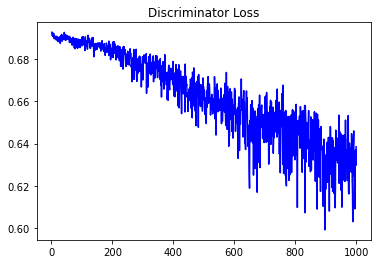

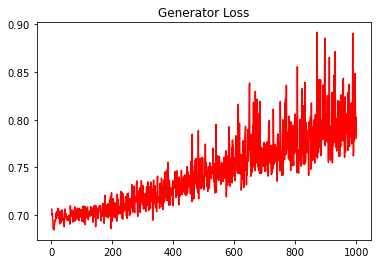

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.556821941619739


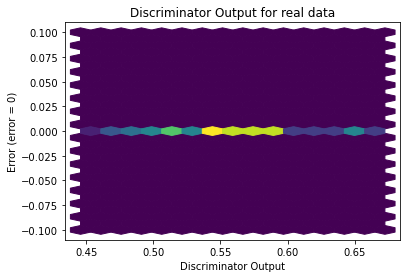

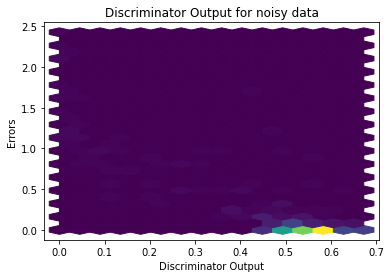

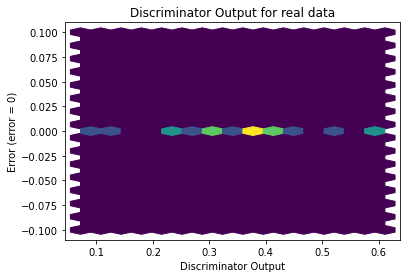

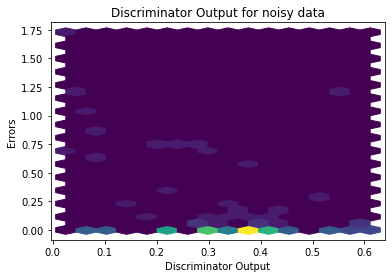

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


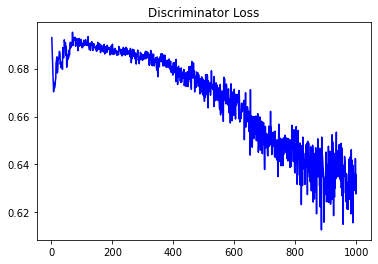

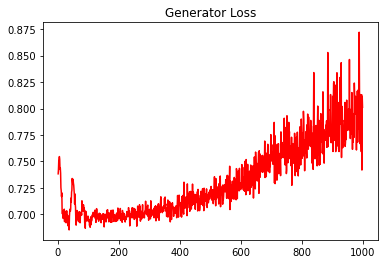

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5558431899156422


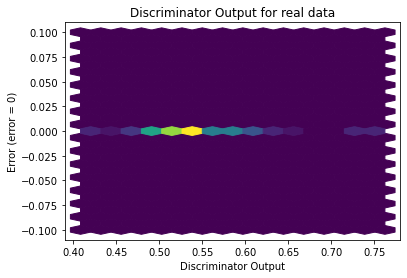

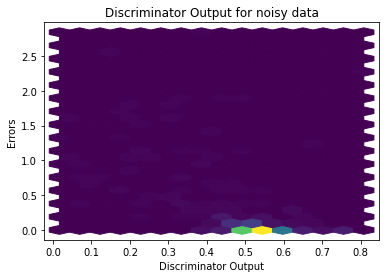

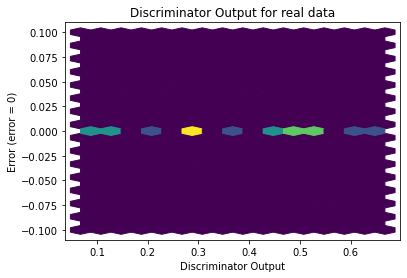

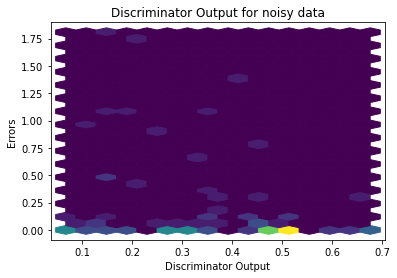

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2143]], requires_grad=True)
